# Lecture 8

**Authors:**
* Yilber Fabian Bautista

**Last date of modification:**
 January 9th 2021

Hello there, 

Welcome to Lecture 8 of this mini-lecture series on programing with Python. In this series, you will learn  basic and intermediate python tools that will be of great use in your scientific carer

**Objectives:** 

By the end of this lecture you will be able to:
* Handle exceptions using **try/except/else/finally** statements
* Create, modify, save, and interact with **HDF5** files
* **Fit** curves to a given set of data points using **curve_fit** module in ** scipy.optimize** library
* Do histograms using the **np.histogram** module

## Syntax Errors and Exceptions

Up to now you have probably encounter many error types when writing a code. Here we will learn how to handle them in python.
### Syntax Errors
These are perhaps the more common type of errors. For instance, when using loops:
```py
a = [1,2,3]
for i in a
    print(i)
```
we will get the output 
```py
 File "<ipython-input-35-1c9a826f45d1>", line 2
    for i in a
              ^
SyntaxError: invalid syntax
```
which indicates we forgot the colon (`:`) symbol at the end of the `for` line.
These type of error are usually easy to solve in the code. 

### Exceptions
Additional errors can be raised in an execution even if the code is syntactically correct.  Errors detected during execution are called **exceptions**. Some of the most common **exceptions** are the `ZeroDivisionError`, `NameError` and the `TypeError`.
```py
>>> print(15*(5/0))
---------------------------------------------------------------------------
ZeroDivisionError                         Traceback (most recent call last)
<ipython-input-36-aeac89dcc3a0> in <module>
----> 1 print(15*(5/0))

ZeroDivisionError: division by zero
```

or
```py
>>> 4 + rd*3
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-39-41bc87660eee> in <module>
----> 1 4 + rd*3

NameError: name 'rd' is not defined

```
and
```py
>>> 3 + '3'
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-40-4ab8cd832a54> in <module>
----> 1 3 + '3'

TypeError: unsupported operand type(s) for +: 'int' and 'str'
```

## Try/except statements for  handling exceptions
In python we can  handle **exceptions** in a very easy way. This is done through the **try**/**except** statements. See for instance [here](https://docs.python.org/3/tutorial/errors.html). Let us see this with a simple example:

In [1]:
a = 0
try:
    print(2/a)
except ZeroDivisionError:
    print('zero division')

zero division


The try statement works as follows:

* First, the **try clause** (the statement(s) between the **try** and **except** keywords) is executed.

* If no exception (error in the execution) occurs, the **except** clause is skipped and execution of the **try** statement is finished.

* If an **exception** occurs during execution of the **try** clause, the rest of the clause is skipped. Then, if its `type` matches the exception `named` after the **except** keyword, the **except clause** is executed, and then execution continues after the try/except block.

* If an exception occurs which does not match the exception named in the **except clause**, it is passed on to outer **try** statements; if no handler is found, it is an **unhandled** exception and execution stops with an error message.

Let us for imagine we want to perform the division of a number  by all of  the elements of a given list. If the list has `zero` entires, we could have error messages and our code will stop. However, we can use  **try/except** statements to skip over the zero divisions as in the following example:

In [2]:
b = [1,3,0,5,0,2]

for i in b:
    try:
        print('2/'+str(i)+' =',2/i)
    except ZeroDivisionError:
        print('zero division')


2/1 = 2.0
2/3 = 0.6666666666666666
zero division
2/5 = 0.4
zero division
2/2 = 1.0


A **try** statement can have more than one **except** clause. As follows

In [3]:
c = [1,3,0,5,0,"2"]

for i in c:
    try:
        print('2/'+str(i)+' =',2/i)
    except ZeroDivisionError:
        print('zero division')
    except TypeError:
        print('strings are not allowed as denominators')


2/1 = 2.0
2/3 = 0.6666666666666666
zero division
2/5 = 0.4
zero division
strings are not allowed as denominators


or even a except clause may name multiple exceptions as a parenthesized tuple, for example:

In [4]:
c = [1,3,0,5,0,"2"]

for i in c:
    try:
        print('2/'+str(i)+' + '+str(i)+' =',2/i+i)
    except (ZeroDivisionError,TypeError):
        print('an error occurred')

2/1 + 1 = 3.0
2/3 + 3 = 3.6666666666666665
an error occurred
2/5 + 5 = 5.4
an error occurred
an error occurred


### else and finally statements
Further statements clauses are support  once they are specified after the main **try/except**. They are the **else**  and the **finally** statements:
#### else statement

the **else** clause, which, when present, must follow all except clauses, is useful for code that must be executed if the try clause does not raise an exception: Example

In [5]:
try:
    print(2/4)
except ZeroDivisionError:
    print('zero division')
else:
    print('no errors occurred')

0.5
no errors occurred


Using the **else clause** is more recommended  than adding additional code to the try clause. This is done to   avoids accidentally catching an exception that was NOT raised by the code being protected by the **try/except** statement.

####  finally statement

This provides an optional clause which is  corresponds to a clean action that must be executed under all circumstances. That is, it  runs whether or not the **try** statement produces an **exception**

Let us see an specific  example

In [6]:
c = [1,3,0,5,0,"2"]
n = 1
for i in c:
    
    try:
        print('2/'+str(i)+' =',2/i)
    except ZeroDivisionError:
        print('zero division')
    except TypeError:
        print('strings are not allowed as denominators')
    finally:
        print('end of iteration',n)
    n+=1     

2/1 = 2.0
end of iteration 1
2/3 = 0.6666666666666666
end of iteration 2
zero division
end of iteration 3
2/5 = 0.4
end of iteration 4
zero division
end of iteration 5
strings are not allowed as denominators
end of iteration 6


To learn more about error handling see [here](https://docs.python.org/3/tutorial/errors.html). 

## HDF5 files

See documentation [here](https://docs.h5py.org/en/stable/quick.html).

**HDF** stands for “Hierarchical Data Format”. An HDF5 file contains two kinds of objects: `datasets`, which are **array-like** collections of data, and ` groups`, which are **folder-like** containers that hold datasets and other groups. Schematically, an **HDF5** file looks as follows

<img src="Figures/HDF5_gen.png" width="600" height="400">


Figure taken from [here](https://icmplus.neurosurg.cam.ac.uk/home/icm-features/hdf5-new-icm-data-format/).
The Groups and datasets can be further commentated with **metadata**  contained in associated **Attributes**. We will expand on this bellow. 

The fundamental thing to have in mind when dealing with **HDF5** files is: **Groups** are used  like **dictionaries**, whereas **datasets** work like **NumPy arrays**.

## Installation

See [Quick start guide](https://docs.h5py.org/en/stable/quick.html) for installation with *conda* or *pip*

### Opening  HDF5 files

Let us suppose someone handled us an `HDF5` file and we want to use it. We first need to  import the `h5py` library in python to manipulate such a file. This is done through the command
```py
import h5py
````
To open our existing `HDF5` file we have two options:

 * The syntax for the first one is:

```py
f = h5py.File('myfile.hdf5','r')
# Do something

f.close()

```
Here `f` is an instance of the file, which is then closed using the  `close()` attribute, when the `HDF5` file if no longer needed. 

* The second option is via a `with` block:

```py
with h5py.File('myfile.hdf5', 'r') as f:
    # Do something
        
```
To close the  `HDF5` file in the second method  we simply need to leave the `with` block.


The keyword argument  `r` stands for `read`, which means we can only read but not modify the `HDF5` file. In the next table we can see other keyword arguments commonly used when dealing with data files. We will use some of them bellow
<img src="Figures/rwa.png" width="600" height="400">


The `with` statement seems a bit cryptic, and indeed it is a short statement for several steps made behind scene. A generic `with` statement has the syntax (see [here](https://www.python.org/dev/peps/pep-0343/) for more details):
```py
with EXPR as VAR:
    BLOCK
```

and is translated into the following lines of code:

```py
mgr = (EXPR)
exit = type(mgr).__exit__  # Not calling it yet
value = type(mgr).__enter__(mgr)
exc = True
try:
    try:
        VAR = value  # Only if "as VAR" is present
        BLOCK
    except:
        # The exceptional case is handled here
        exc = False
        if not exit(mgr, *sys.exc_info()):
            raise
        # The exception is swallowed if exit() returns true
finally:
    # The normal and non-local-goto cases are handled here
    if exc:
        exit(mgr, None, None, None)
```
where (mgr, exit, value, exc) are internal variables that are not accessible to the user.

For our specific example, `EXPR = h5py.File('myfile.hdf5', 'r')` and `VAR = f`, and finally, `BLOCK = do something`. The `with` statement  effectively creates an instance of the `__enter__` attribute and store it into a variable called `value`. If `VAR` is specified, then  `value` is assigned to  `VAR`, and all operations specified in `BLOCK` are carried over, provided no **exceptions** appear. Otherwise, the `with` statement will handles these **exceptions** as shown by the use of **try/except** statements. Finally, once the file is not longer needed, it is closed using the `__exit__` attribute.

 

In order to make  the discussion more precise, we work explicitly with the following example:

We are handled the `mytestfile.hdf5` file and we want to access all the information contained inside it. We start by opening the file using the ` h5py` library

In [7]:
import h5py

# Open a hdf5 file
f = h5py.File('hdf5/mytestfile.hdf5','r')

# Close the file if no longer needed
#f.close()

### Keys of a HDF5 file

Likewise for dictionaries,  we can as for the set of keys contained in the file by using the attribute `keys()`: In our example, the line
```py
f.keys()
```
will produce the output
```py
<KeysViewHDF5 ['mydataset', 'mygroup']>
```
This means our `HDF5` file has two objects labeled by the keys `'mydataset'` and  `'mygroup'`. In principle they can correspond to either **datasets** or **groups** of our `HDF5` file. 

### Accessing a group or data set 
To explicitly know the nature of the two keys in our example, we need to call our file `f` with the specific key using an dictionary-like syntax:
```py
f['mydataset']
```
this will produce the  output 

```py
<HDF5 dataset "mydataset": shape (20,), type "<i4">
```
We observe therefore that  `"mydataset"` indeed corresponds to a **dataset** of the `HDF5` file. It contains  a one dimensional array with 20 entries, whose elements are  integers. 

We can do the same for the remaining key
```py
f['mygroup']
```
with output 
```py
<HDF5 group "/mygroup" (1 members)>
```
This means that `mygroup` corresponds instead to a **group** of the  `HDF5` file, and hosts another element which can be either a **dataset** or a **group**. Recall **groups** are like **dictionaries**, and therefore, the logic to access the keys for the elements contained in the group is the same,  that is, by using the `key()` attribute.  In our example we have
```py
f['mygroup'].keys()
```
with output 
```py
<KeysViewHDF5 ['newdataset']>
```

In [8]:
# Try it yourself

### Accessing the information in a dataset 

Now that we know how to ask for the keys in a `HDF5` file, and access the groups and datasets inside them, we want to be able to use the information stored in the datasets themselves. Recall **datasets** are like **np.arrays**, and therefore we can use all of the numpy machinery on them. Let us see that with the dataset contained in `'mydataset'` keyword in our previous example

In [9]:
data = f['mydataset']
data[:]

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95], dtype=int32)

We can for instance slice the array,
```py
data[2:-3]
```
or even plot it

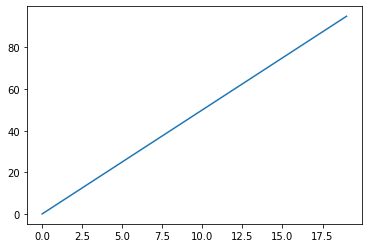

In [10]:
import matplotlib.pyplot as plt 
plt.plot(data)

Similarly, one  can now ask how to access the dataset contained in the group `'mygroup'`. For that we have several options:
* By assigning a new variable to `f['mygroup']`, and then accessing `'newdataset'` using  a keyword argument
```py
grp = f['mygroup']
dset = grp['newdataset']
dset
```
with output 

```py
<HDF5 dataset "newdataset": shape (), type "<f8">
```
That means that `dset` is a scalar (shape() array), and therefore to access it we use the syntax
```py
dset[()]
```
which will produce as output the float number `50.0`

In [11]:
# Try it yourself

* We avoid too many variable assignation we can simply use repeated indexing
```py
dset = f['mygroup']['newdataset']
```
which will have the same effect. 

* To avoid too many square brackets we can simply use a path-like argument:
```py
dset = f['/mygroup/newdataset'][()]
dset
```
where we have already  accessed the scalar element, getting as output the number `50.0`.  This is the path specification for Mac and Linux. For windows you will  have to use
```py
dset = f['\\mygroup\\newdataset'][()]
dset
```


In [12]:
#try it yourself

The discussion above shows how simple it is to navigate through the `HDF5` file by using keyword arguments. 

### Attributes of  groups and data sets
The last feature to explore in our `HDF5` file is to ask for the **Metadata** stored in **attributes** of the `HDF5` file itself, groups and datasets.  For that we use the `.attrs` proxy. See [documentation](https://docs.h5py.org/en/stable/high/attr.html#h5py.AttributeManager.keys). Let us see for instance if our `HDF5` has attribute keywords:

In [13]:
f.attrs.keys()

<KeysViewHDF5 []>

the output is an empty list meaning that the file itself does not have attribute keywords. 

We can ask the same for the groups and datasets

In [14]:
f['mygroup'].attrs.keys()

<KeysViewHDF5 ['new_atribute']>

in this case, the group `'mygroup'` has an attribute given by the keyword `'new_atribute'`. We can access its content in the usual indexing-like form

In [15]:
f['mygroup'].attrs['new_atribute']

1.0

namely,  the attribute  has just assigned the integer value 10.  You can check that the datasets do not have any attribute by using the same logic
```py
f['mygroup/newdataset'].attrs.keys()
```
and 
```
f['mydataset'].attrs.keys()
```
both of which produce as output an empty list.

Attributes have the following properties as specified in the [documentation](https://docs.h5py.org/en/stable/high/attr.html#h5py.AttributeManager.keys)

* They may be created from any scalar or NumPy array
* Each attribute should be small (generally < 64k)
* There is no partial I/O (i.e. slicing); the entire attribute must be read.

### Closing the `HDF5` file

Once we finish using the file we can simply close it using the `close()` attribute. 

In [16]:
f.close()

# Exercise 1
Repeat the all the above discussion but opening the file using a `with` block. Hint: use the `'r'` argument, and recall indentation is important.  `print` statements are also useful.

## Creating an HDF5 file

We might now wonder how was `mytestfile.hdf5` file created. We simply used the following code:
```py
import h5py
import numpy as np

with h5py.File('mytestfile.hdf5', 'w') as g:
 
    dset = g.create_dataset("mydataset", (20,),data = np.arange(0,100,5), dtype='i')
    grp2 = g.create_group('mygroup')
    dset2 = grp2.create_dataset("newdataset", data = 50.)
    grp2.attrs['new_atribute'] = 1.0
```
which we now proceed to explain in detail: 

1. The first step is of course to create the datafile with the given name, in this case `mytestfile.hdf5`, and use the `'w'` (write) keyword, as indicated in the table above. We create the file under the alias `g`. Up to here, a new `HDF5` file will be created in the same location of our notebook. (To specify a particular location we use the path for it. example: `with h5py.File('Documents/my_files/Explore/.../mytestfile.hdf5', 'w') as g` ). The newly created file will be an empty file which we then proceed to fill with **groups** and **datasets**

2. In the first indented line, ` dset = g.create_dataset("mydataset", (20,),data = np.arange(0,100,5), dtype='i')`, we have created a new dataset, whose keyword is `"mydataset"`. It contain a one dimensional array  with 20 entries, given by the `20` elements in `np.arange(0,100,5)`. We further specified the data type using the ` dtype` keyword.  
3. In the second line, `grp2 = g.create_group('mygroup')`, we have simply added a new group, as clearly indicated by the syntax. 
4. In the next line we have added a new dataset to our existing group, where now the data corresponds to a scalar object
5. Finally we assigned the attribute `'new_atribute'` with value `1.0`, to the existing **group**. 

And that's it! 

# Exercise 2
Create your own `HDF5` file including groups, datasets and attributes. 

## Modifying an existing `HDF5` file

In lecture 5 we learned how to modify `csv` files using **pandas** library. Existing `HDF5` files can also be modified. Let us see how this work with an specific example. 

First, let us create a new `HDF5` file example which will be the object to manipulate

In [17]:
import h5py
import numpy as np

with h5py.File('test_file.hdf5', 'w') as t:
    dat = np.random.random((5,5))
    dset = t.create_dataset("rand2d",data = dat)

We  now open the created `'test_file.hdf5'` file  using the `r+` keyword, which stands for read and write, as shown explicitly in our table above. 

In [18]:
test  = h5py.File('test_file.hdf5','r+')

# To see we are able to use our file, let us for instance print the values contained in our dataset  
print('Dataset rand2d: ', test['rand2d'][:])

# Now we can manipulate it,  for instance, we  add a group into our existing file,
# a data set in that group, and an additional subgroup
new_group = test.create_group('test_group')
new_sub_group = new_group.create_group('test_sub_group')
new_dset = new_group.create_dataset("geom_space",data = np.geomspace(1,100,10))

# Check that the group was added correctly by, for instance, checking the keys  
print()
print('keys after adding test_group and : ' , test.keys())

# And access our `'geom_space'` dataset
print()
print('geom_space data', test['test_group/geom_space'][:])

#Close the file
test.close()

Dataset rand2d:  [[0.88090526 0.19770984 0.80003906 0.925955   0.98788248]
 [0.29289838 0.84884995 0.61698776 0.64015508 0.98897454]
 [0.05720752 0.10236201 0.2404915  0.85757266 0.52072522]
 [0.19194215 0.23464809 0.01652625 0.3963614  0.39902037]
 [0.72860068 0.54716193 0.84212134 0.82137125 0.1190649 ]]

keys after adding test_group and :  <KeysViewHDF5 ['rand2d', 'test_group']>

geom_space data [  1.           1.66810054   2.7825594    4.64158883   7.74263683
  12.91549665  21.5443469   35.93813664  59.94842503 100.        ]


In the previous block of code we have modified the existing `'test_file.hdf5'` file. Finally we check that our original `'test_file.hdf5'` file has saved all the changes made above by opening it using the `r` mode only.

In [19]:
with h5py.File('test_file.hdf5','r') as t2:
    print('keys', t2.keys())
    print()
    print('geom_space_data',  t2['test_group/geom_space'][:])

keys <KeysViewHDF5 ['rand2d', 'test_group']>

geom_space_data [  1.           1.66810054   2.7825594    4.64158883   7.74263683
  12.91549665  21.5443469   35.93813664  59.94842503 100.        ]


which indeed has all of the changes made in the previous block code. 

One has to be careful when modifying `HDF5` files, since datasets added using already existing keywords will overwrite the existing datasets. Similarly, `HDF5` files created with names of files already existing, will overwrite the existing files. 

Notice we have  interchangeably manipulate `HDF5` using or not the `with` blocks, to show the equivalence of the different ways of handle data files. 

## Why using `HDF5` files?

* Allow to save large amount of data in a single file, using a  hierarchical structure.

* Integrates nicely with **numpy** and **pandas**
* The  hierarchical structure allows  to search for a specific dataset in the file.
* Allows attaching **metadata** to every element in the  hierarchical structure, making it ideal for generating self-explanatory files.
* Data is read from the hard drive only when it is needed.






# Example

Let us now gain some experience using real `HDF5` files, in the context of Dark Matter (DM).

The <a href="https://wwwmpa.mpa-garching.mpg.de/auriga/"> Auriga project  </a>   provided us with the  data file <code>  'halo_1_DMO.hdf5' </code> which contains   a set of  simulated DM particles placed between 4-15 kpc in a dark matter-only halo. In the data set,  we have access to  the particles' <code> 'Coordinates' (x, y, z in kpc) </code> ,  <code> 'Mass' (in Solar masses) </code>, and  <code> 'Velocities' (vx, vy, vz in km/s) </code> . In this example, and Exercise 3 bellow, we aim to learn some properties of the DM halo described by this data file. 

Let us start by loading the data file 

In [20]:
halo  = h5py.File('hdf5/halo_1_DMO.hdf5','r')

We can access the keys in the file if unknown by using multiple times the `key()` attribute, as broadly specified above.  For instance, we can  access the particles cartesian positions as follows:


In [21]:
positions = halo['DarkMatter/Coordinates'] # if using windows, the paths need to be modifed accordingly
x = positions[:,0]
y = positions[:,1]
z = positions[:,2]

Here `positions` is an array whose entries correspond to the 3-coordinate positions for each particle (effectively a set of  1 dimensional arrays stack along a given axis, see [numpy.stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html) ). The notation ` positions[:,0]` works as follows: In the first entry we are  selecting all of the elements in the array (the `:`), and in the second entry we ask for only the `0` element for each of such elements. Analogous for `positions[:,1]` and  `positions[:,2]`. 

It is useful to do some data visualization, for instance by plotting the DM positions.

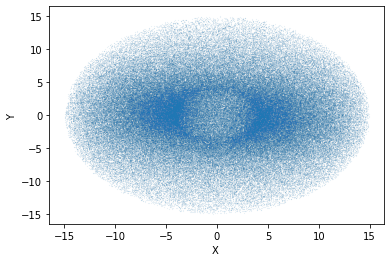

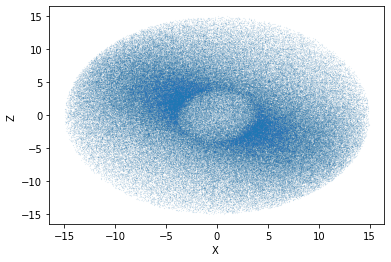

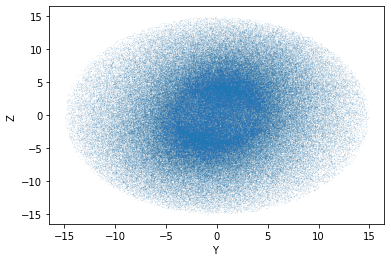

In [22]:
# x vs y plot
plt.scatter(x,y, s=0.001)
plt.xlabel("X ")
plt.ylabel("Y ")
plt.show()

# x vs z plot
plt.scatter(x,z, s=0.001)
plt.xlabel("X ")
plt.ylabel("Z ")
plt.show()

# y vs z plot
plt.scatter(y,z, s=0.001)
plt.xlabel("Y ")
plt.ylabel("Z ")
plt.show()

here we have used the  `s = ...` keyword argument to vary the size of the points in a scatter plot

### Density profile from  simulations
We are  interested in knowing the DM density distribution assuming a spherically symmetric halo. In practice we will  calculate the density from the summed mass of particles within, for instance,  logarithmically-spaced spherical shells. Since all DM particles have the same mass (as you can easily check in the file), the DM density in between two given shells separated by a distance  $\Delta r_i= r_{i+1}-r_i$,  can be computed from 
$$
\rho_i  = \frac{m N_i}{4/3\pi(r_{i+1}^3-r_{i}^3)},  
$$
where  $N_i$ is the total number of particles contained in between the  two concentric shells. 

To compute $N_i$ we need  first to compute all the radial positions for our particles from  the norm of the position vector $$r_i= \left|\vec{r}_i\right|= \sqrt{x_i^2+y_i^2+z_i^2} .$$ Then, we can count how many particles are there for given  shells bins, using a histogram.  

Recall datasets behave like **Numpy arrays**, then we can use all the numpy machinery.

In [23]:
# compute the radial positions of DM particles in the halo
r = np.sqrt(np.sum(positions[:]**2, axis=1))

Let us now  compute the number of particles in between two shells. First we need to define the radial bins (shells separations) to be used. As we mentioned, we will use logarithmically spaced shells. The largest and smallest shells' radii will be the  min and max values in the radial positions for our DM particles respectively. 

In [24]:
r_bins  = np.geomspace(min(r),max(r),100)

each bin,  `r_bins[i+1]-r_bins[i]` for $i\le len(\text{r_bins})$, corresponds to the distance $\Delta r_i$ between  two adjacent, spherical shells. There are $len(\text{r_bin})-1$ bins in total. 

To do the histogram we use the [histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) function in the `numpy` library

In [25]:
N, r_bin_h =  np.histogram(r, bins = r_bins)

Here, `N` give the number of DM particles, in a given radial bin (Notice `r_bins = r_bin_h`). However, we have to notice that `len(N)=99` whereas `len(r_bins)=100`. As mentioned above, the number of bins is $len(r_bins)-1=100-1=99$. Then, we need to compute the bins centers, which are `99` instead of `100`. They  are  simply given by

In [26]:
# Bins centers
r_bin_c = np.array([(r_bins[i+1] + r_bins[i])/2 for i in np.arange(len(r_bins)-1)])

Let us further visualize our results by  plotting our counts as function of the bins centers

<BarContainer object of 99 artists>

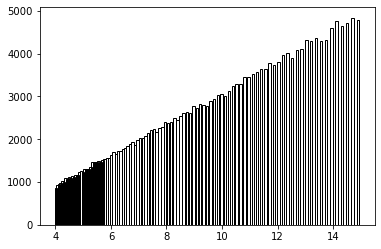

In [27]:
plt.bar(r_bin_c,N,fill=False, width=0.09)

The last ingredient to compute the DM density distribution is the particles  mass, which we extract from our `halo` file as follows

In [28]:
m = halo['DarkMatter/Mass'][0]
m

353725.33898061706

We now have all the elements needed to compute the DM mass density

In [29]:
rho = np.array([m*N[i]/(4/3*np.pi*(r_bins[i+1]**3-r_bins[i]**3)) for i in range(len(N))])

In a plot, the DM distribution as function of the  bins centers is

Text(0, 0.5, 'rho [M_s/kpc^3] ')

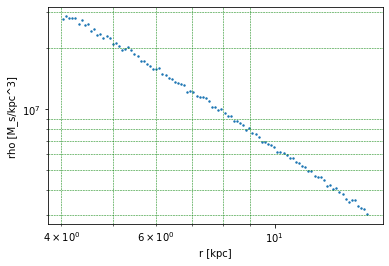

In [30]:
plt.scatter(r_bin_c,rho, s=2)
plt.xscale('log')
plt.yscale('log')
plt.grid(which="minor",color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel("r [kpc]")
plt.ylabel("rho [M_s/kpc^3] ")

# Curve fitting

The next task is to obtain an analytic expression, $\rho(r)$, that best describes the behaviour for the DM density as function of the radial position observed in the curve above. For that, we use **curve fitting**. 

As name indicates,  **curve fitting** is the process of finding the curve that best describes a series of data points. We will use the [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function given in  the `scipy` library. The curve fitting process can be split in the following steps:
1. Collect the data
2. Define objective function (The function that probably will describe well the data. It has free parameters that can be fixed from the fit)
3. Do the fit
4. Compute the goodness of the fit

#### 1.  Collect the data
We did step 1. in our previous analysis and have the data `(rho,r_bin_c)` ready to be used. 

#### 2. Objective function
Spherical DM density distributions are known to be well fitted by a universal function known as the NFW (Navarro, Frenk and White) density profile. See for instance [here](https://en.wikipedia.org/wiki/Navarro%E2%80%93Frenk%E2%80%93White_profile). It has the analytic form

$$
\rho(r) =  \frac{\rho_s}{r/r_s(1+r/r_s)^2},
$$
where $\rho_s$ and $r_s$ are two halo dependent parameters. Notice that $\rho(r) \to  \rho_s \frac{r_s}{r}, $ as $r\to 0 $. This is known as a cuspy profile and has discrepancy with observations of dwarf galaxies (See for instance this [review](https://arxiv.org/pdf/1705.02358.pdf)). 

Let us define our objective function

In [31]:
def rho_obj(r, r_s, rho_s):
    return rho_s/(r/r_s)/(1+r/r_s)**2
    

#### 3. Doing the fit

This is a very simple step, we just need to import the `curve_fit` module from the `scipy` library. The syntax for using the function is the following:
```py
curve_fit(f,xdata,ydata,p0=None,sigma=None,)  
 ```
where `f` is the objective function, `p0` is an initial guess for the free parameters (if non specified, the default value is `p0={1}`), and `sigma` are the uncertainties in the data (`xdata` and `ydata`). Our histogram  has naturally uncertainties in the counts given by the Poisson errors $\sim \sqrt{N}$

This induces an  uncertainty in $\rho$ via 
$$
\sigma_\rho = \frac{m \sqrt{N_i}}{4/3\pi(r_{i+1}^3-r_{i}^3)}
$$
Let us first compute those uncertainties, since they will be used in the fitting process

In [32]:
sigma_rho = np.array([m*np.sqrt(N[i])/(4/3*np.pi*(r_bins[i+1]**3-r_bins[i]**3)) for i in range(len(N))])

The  `curve_fit` function   will return the values for the parameters  that best fit the curve, and the [covariance](https://en.wikipedia.org/wiki/Covariance_matrix) matrix.
That is, the parameters that  minimize the $\chi^2$ function, defined by $$\chi_n^2=\sum_{i=1}^n\left(\frac{y_i-f(x_i,p_0)}{\sigma_{y_i}}\right)^2,$$
where $f(x_i,p_0)$ is the objective function evaluated at the $i$-position, with parameters $p_0$. $y_i$ are the data points, whose uncertainties are denoted by  $\sigma_{y_i}$, and $n$ is the number of data points to be fitted in our curve. 


It is well known that $\chi_n^2$ typical values are $$\frac{\chi_n^2}{\text{dof}}\approx 1,$$  where dof is the number of degrees of freedom, defined by $$\text{ dof} = n-\text{len}(p_0).$$

Then, $\chi_n ^2\gg n$ signals a  bad fit, whereas  $\chi_n^2 \ll n$ indicates that the error bar in the data are wrongly estimated.

Without further ado, let us proceed to do the fitting

In [33]:
from scipy.optimize import curve_fit

In [34]:
# Do the fit
par, c_matrix = curve_fit(rho_obj,r_bin_c,rho, sigma = sigma_rho )
#extract the fit parameters
r_s,rho_s = par
print('The fit parameters are: '"rho_s = ",rho_s,", r_s =", r_s)

The fit parameters are: rho_s =  14016518.826516252 , r_s = 13.884494659397033


Let us plot our findings and compare them to the data

The fitted NFW parameters are: rho_s =  14016518.826516252 M_s/kpc^3 , and r_s = 13.884494659397033 kpc


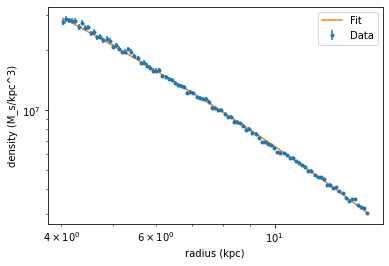

In [35]:
#Fitted function
rho_fit =  rho_obj(r_bin_c,r_s, rho_s)

#plot
plt.errorbar(r_bin_c,rho,yerr=sigma_rho,label ="Data",linestyle="None",fmt='.')
plt.xscale('log')
plt.yscale('log')
plt.loglog(r_bin_c,rho_fit ,label = "Fit")
plt.xlabel('radius (kpc)')
plt.ylabel('density (M_s/kpc^3)')
plt.legend(loc="upper right")
print('The fitted NFW parameters are: '"rho_s = ",rho_s,'M_s/kpc^3',", and r_s =", r_s, 'kpc')
plt.show()

#### Goodness of the fit

The goodness of the fit is given by the $\chi^2$ function. As already indicated, for a good fit we expect to have a $\chi^2\sim \text{dof}$. Let us explicitly check this 

In [36]:
# Define the chi^2 function
def chi_s(y,y_fit,dy):
    """chi_square function"""
    return sum(((y-y_fit)/dy)**2)

applied to our example we have

In [37]:
chis = chi_s(rho,rho_fit,sigma_rho)

Now let us compare it to the number of degrees of freedom 

In [38]:
dof = len(rho) - len(par)
print(chis / dof)

1.2134560290753849


which as expected, is a number of  $\mathcal{O}(1)$

# Exercise 3 Velocity distribution function for particles in the solar vicinity

In this exercise you will obtain the velocity distribution of DM particles in the solar vicinity, and fit it to a Maxwell-Boltzmann distribution function. The sun is positioned at  $r = 8 kpc $. Let us as usual split this exercise in several steps

1. Firts we want to find all the particles whose radial position lies in  the interval $ 7 \rm kpc \, \le r_i \, \le 9 \rm kpc $. Define a function <code>  find_index(dat) </code>, that takes as input a set of data, and return a 1-dimensional numpy array whose elements are  the indexes  of the elements in <code> dat </code>, that satisfy $ 7 \le dat[i] \le 9 $. 

2.  Define the list <code> index</code>,  using  the <code> find_index </code> function, applied to our particles radial positions `r`, defined in the above example. It will contain the indexes of the  particles in the solar vicinity. 

3. Count the number of  particles  in the solar vicinity, and compare the result  to the total number of particles. Hint: You might find useful  the function <code> len() </code>

4. Now that we know what particles are in the solar vicinity, we can ask for the velocity of those particles. Extract the  particles velocity in the data set  <code> halo </code> defined above, and select velocities for the particles lying in the solar vicinity. Hint (Loop over the entries of the list `index` defined in step 2)

5. compute the speeds of the particles in the solar vicinity. Recall the speed of particle i,  is given by the norm of the three-vector $v_i = |\vec{v}_i|$. Hint: See the example above for computing the norm of $r$; the <code> np.dot </code> function might be helpful 

6. Using the `np.histogram` function, obtain the number of particles in the velocity bins  `v_bins = np.linspace(0,v_max,50)`, where `v_max` is the largest speed for particles in step 5. Plot the velocity distribution (i.e. N_v counts ad  function of the speed bins centers)

7. Normalize the velocity distribution in such a way that $$\int_{0} ^{v_{max}}dv  f(v)  = 1$$ Since  all our bins have the same size $\Delta v$,  the integral reduces to perform the  sum $$\sum_{i=1}^N  f_i \times \Delta v$$ From the `lin`-space grid, find $\Delta v$ and compute the sum.

8. At this step we have available the data `(f_v,v_bins)` where f_v is normalized as indicated in the previous step. Now we can compute the Poisson error from our histogram. They will be given by 
```py
sigma_v = np.sqrt(N_v)/(Delta_v*sum(N_v))
```
where `N_v` are the velocity counts from the histogram.

9. Now that we have the data (f_v,v_bins,sigma_v ), we can do an error bar plot for  visualization. The plot should look similar to the following image

<img src="Figures/v_distr.png" width="400" height="300">

10. Fit a Maxell-Boltzmann function to the velocity distribution
$$
f(v) = \frac{4v^2}{\sqrt{\pi}v_0^3}\exp(-v^2/v_0^2)
$$
here $v_0$ is the parameter to be fitted . Hint: Use `p0=200` as initial guess for the fitted parameter

11. Plot your findings and compute the goodness of the fit